# COGS 108 Final Project

# Overview
An analysis on health inspection data of food service facilities from Wake County, North Carolina, USA. I focused on finding factors that could potentially affect the score of a health inspection and analyzed their relationship. After cleaning and processing the datasets, I used some statistical methods to build a model that represents and predicts the score of a health inspection.

# Name and GitHub: 
Name: Fransisca Olivia Sudjati

GitHub: oliviasudjati

# Research Question
Can we determine the health inspection score of these food service facilities based on some variables? Are factors like the amount of violations conducted before, the severity of the violations, or even the median income of the residing area correlated to these scores?

## Background and Prior Work

Health inspections are done by the Wake County Health Department, per NC state health regulations. The twelve municipalities that fall under Wake County include: Apex, Cary, Fuquay-Varina, Garner, Holly Springs, Knightdale, Morrisville, Raleigh, Rolesville, Wake Forest, Wendell, and Zebulon (1) . Scores are on a scale from 0-100, with 0 being the lowest and 100 the highest. Each food service facility are assigned an HSISID, a unique state code identifying the facility (2).

The frequency at which facilities are inspected depend on the assigned risk category (2), where:

-) Risk Category I: applies to food service establishments that prepare only non-potentially hazardous foods, inspected once a year.

-) Risk Category II: applies to food service establishments that prepare only non-potentially hazardous foods, inspected twice a year.

-) Risk Category III: applies to food service establishments that cook and cool no more than three potentially hazardous foods inspected three times a year.

-) Risk Category IV: applies to food service establishments that cook and cool no more than three potentially hazardous foods. Applies to food service establishments that cook and cool an unlimited number of potentially hazardous foods. This category also includes those facilities using specialized processes or serving a highly susceptible population. Inspected 4 times a year.

Health inspection grades are made available to the public through an online portal (3). The comprehensive food code manual book for restaurants and other types of facilities are also available, although it is dated at 2009, so I am unsure if it is up to date or not (4)(5).

References:
- 1) [About Wake County](http://www.wakegov.com/about/Pages/municipalities.aspx)
- 2) [Wake County food inspection information](http://data-wake.opendata.arcgis.com/datasets/food-inspections)
- 3) [Wake County Restaurant and Sanitation Inspection Grades online portal](http://wake-nc.healthinspections.us/qsearch.cfm)
- 4) [Wake County restaurants food code manual](http://www.wakegov.com/food/healthinspections/rules/Documents/NC%20Food%20Code%20Manual%202009%20FINAL.pdf)
- 5) [Manuals for other types of food service establishments](http://www.wakegov.com/food/healthinspections/rules/Pages/default.aspx) 

# Hypothesis
I will be doing a hypothesis test where under the null, health violation scores have no association with any other variables. The alternative hypothesis is that there exist at least one variable that is associated with the health inspection scores.

$$ H_0: \text{there is no association between health inspection scores and any other variables} $$
$$ \text{vs.} $$
$$ H_1: \text {there exist at least one variable that is associated with health inspection scores} $$

I formed this hypothesis as the null always assumes no relationship between the parameters, but my own prediction is there will be at least one variable associated with the health inspection scores, as there are many variables that could affect this. Probability wise, I think that it is more likely for at least one of these variables to be statistically significant.

# Datasets
* #### inspections.csv

Health inspection data for food service facilities in Wake County from 2012-2016, available for use to the public. Every observation has a HSISID that is unique for each facility. Information included are identifiers about the facility such as the name, phone number, zipcode, address and longitude and latitude coordinates of the facility, as well as information regarding the inspection itself. These include score of the inspection, date, inspector name, amount of critical and non-critical at the time, if any, and the amount of any previous violations. There are some columns that I do not understand, such as avg_neighbor_num_non_critical/critical, top_match, and second match. I could not find information regarding these columns online.

Number of observations: 18466

Link: [Food inspection data](http://data-wake.opendata.arcgis.com/datasets/food-inspections)

* #### restaurants.csv

Information about food facilities in Wake County. The name of the file is restaurants but some of the observation in the data are categorized as institutional food service or public lunch rooms. Each observation has a unique HSISID like inspection.csv. There was another column that seemed like a unique identifier called X.objectid, but I could not find any information about it.

Number of observations: 3324

Link: [Restaurants data](http://data-wake.opendata.arcgis.com/datasets/restaurants-in-wake-county?geometry=-80.380%2C35.405%2C-76.864%2C36.184)

* #### violations.csv

Data about health inspections violations. Also include the HSISID identifier, like restaurants.csv and inspections.csv. Includes the date of the violation, whether it is critical or not, and the severity. Severity are grouped into: core, priority, and priority foundation. Priority refers to items that most directly eliminate or reduce a hazard associated with foodborne illness, while Priority Foundation refers to items that help keep Priority violations in compliance and support Priority items. Core refers to items that are related to general sanitation and facility maintenance.

Number of observations: 189802

Link: [Health inspection violations](http://data-wake.opendata.arcgis.com/datasets/food-inspection-violations)

* #### zipcodes.csv

Zipcodes in Wake County along with various population information within each zipcode, such as median_income_household, median_household_income, per_capita_income_dollar, and the percentage of non-white residents. It is unclear when this data was observed.

Number of observations: 38

I plan on merging the data with HSISID since it is a unique identifier for each establishment

# Setup

In [1]:
# Imports 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
import patsy
import statsmodels.api as sm
import scipy.stats as stats
import random
from random import sample
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
plt.rcParams['figure.figsize'] = (10,10)

# Data Cleaning

### Loading Data

In [2]:
insp= pd.read_csv("inspections.csv")
rest= pd.read_csv("restaurants.csv")
viol= pd.read_csv("violations.csv")
zips= pd.read_csv("zipcodes.csv")

### Cleaning inspection.csv

In [3]:
insp= pd.read_csv("inspections.csv")

I removed rows that did not seem relevant to the analysis like inspector name, and removed null rows.

In [4]:
col_to_drop= ['avg_neighbor_num_critical', 'avg_neighbor_num_non_critical','top_match',
              'second_match','num_critical_previous', 'num_non_critical_previous', 
              'previous_inspection_by_same_inspector', 'days_since_previous_inspection',
             'address2', 'phonenumber', 'postalcode', 'restaurantopendate', 'num_non_critical_previous', 
              'num_critical_previous','num_non_critical_previous','num_non_critical_mean_previous',
              'num_critical_mean_previous','critical', 'inspection_num',
             'description', 'previous_inspection_date', 'inspectedby', 'inspector_id','geocodestatus', 
              'days_from_open_date', 'type', 'critical', 'facilitytype']

insp= insp.drop(col_to_drop, axis= 1)
insp.name= insp.name.str.lower()
insp.address1= insp.address1.str.lower()

Checking if there are any typos in the city and state names. I noticed other datasets had a lot of typos in the city names.

In [5]:
insp.city.unique()

array(['raleigh', 'cary', 'zebulon', 'wake forest', 'garner', 'apex',
       'morrisville', 'knightdale', 'fuquay-varina', 'holly springs',
       'wendell', 'rolesville', 'new hill', 'clayton', 'willow spring',
       'angier', 'creedmoor'], dtype=object)

In [6]:
insp.state.unique()

array(['NC'], dtype=object)

In [7]:
insp.head()

,hsisid,date,name,address1,city,state,x,y,zip,score,num_critical,num_non_critical
0,4092013748,2012-09-21T00:00:00Z,cafe 3000 at wake med,3000 new bern ave,raleigh,NC,-78.587963,35.783914,27610,96.0,9,7
1,4092014046,2012-09-21T00:00:00Z,overtime sports pub,1030-149 n rogers ln,raleigh,NC,-78.549673,35.791986,27610,98.0,0,11
2,4092015191,2012-09-21T00:00:00Z,taste of china,6209 rock quarry rd,raleigh,NC,-78.547960,35.723125,27610,97.0,4,8
3,4092016122,2012-09-21T00:00:00Z,panera bread #1643,1065 darrington dr,cary,NC,-78.815727,35.799249,27513,99.0,2,3
4,4092021513,2012-09-21T00:00:00Z,walmart supercenter #4499-00 deli/bakery,841 e gannon ave,zebulon,NC,-78.296347,35.831285,27597,97.0,2,4


### Cleaning restaurants.csv

Dropping any null rows.

In [8]:
rest= rest.dropna(axis= 'rows')

I noticed that a lot of the city names were the same but had different typings or typos, and thus are considered as different values. For example, Fuquay-Varina vs. Fuquay Varina, or Research Triangle Park styled as RTP. Removing columns that are not of interest.

In [9]:
# inconsistent city names, some are duplicates but with lower/upper case or added space
# rdu airport and rdu ; fuquay-varina and fuquay varina; rtp and research triangle park

rest['city']= rest['city'].str.lower() #transform to all lower case
rest['city']= rest['city'].str.strip() #strip trailing spaces
rest.loc[rest.city== 'rdu airport', 'city']= 'rdu'
rest.loc[rest.city== 'fuquay varina', 'city']= 'fuquay-varina'
rest.loc[rest.city== 'research triangle park', 'city']= 'rtp'
rest.loc[rest.city== 'holly spring', 'city']= 'holly springs'
rest.loc[rest.city== 'morrisvile', 'city']= 'morrisville'
rest= rest.drop(['X.objectid','address2', 'geocodestatus', 'restaurantopendate', 'phonenumber',
                 'facilitytype','postalcode'] ,axis= 1)
print(rest.city.unique())

rest.name= rest.name.str.lower()
rest.address1= rest.address1.str.lower()

['wendell' 'raleigh' 'knightdale' 'morrisville' 'zebulon' 'wake forest'
 'cary' 'apex' 'rtp' 'rdu' 'new hill' 'fuquay-varina' 'garner'
 'rolesville' 'durham' 'holly springs']


In [10]:
rest.head()

,hsisid,name,address1,city,state,x,y
9,4092010037,aubrey & peedi`s grill,38 n main st,wendell,NC,-78.369452,35.782462
33,4092015546,hayashi japanese restaurant,13200 new falls of nuese rd,raleigh,NC,-78.559820,35.940755
35,4092016070,big al's bbq,2920 forestville rd,raleigh,NC,-78.509310,35.893594
39,4092016179,freshberry frozen yogurt cafe,2526 hillsborough st,raleigh,NC,-78.669227,35.788352
67,4092017104,dunkin donuts/baskin robbins #331785,7137 knightdale blvd,knightdale,NC,-78.489760,35.798745


### Cleaning violations.csv

The last 3 columns are mostly empty, so I have to remove those columns first before removing any null row values

In [11]:
viol= viol.drop(['X.objectid', 'count', 'cdcdataitem', 'cdcriskfactor', 'violationcode','inspectedby',
                'shortdesc', 'comments', 'questionno', 'category', 'statecode'], axis= 1)

I changed the column critical into 1s and 0s from Yes and No, that way I can possibly use it for regression as a categorical variable.

In [12]:
viol= viol.dropna(axis= 'rows')
viol.loc[viol.critical== 'Yes', 'critical']= 1
viol.loc[viol.critical== 'No', 'critical']= 0

In [13]:
viol.head()

,hsisid,inspectdate,critical,severity,pointvalue,observationtype,violationtype
0,4092015279,2014-09-22T00:00:00.000Z,1,Priority Foundation,0,Out,R
1,4092014572,2014-09-29T00:00:00.000Z,1,Priority Foundation,0,Out,CDI
2,4092015906,2014-10-01T00:00:00.000Z,1,Priority Foundation,1,Out,CDI
3,4092013840,2014-10-08T00:00:00.000Z,1,Priority Foundation,0,Out,CDI
4,4092021788,2014-10-09T00:00:00.000Z,1,Priority Foundation,0,Out,CDI


### Cleaning zipcodes.csv

Zipcodes.csv looks quite clean, I did not do any cleaning.

In [14]:
zips.head()

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


I merged restaurants and violations so that I could get more info on what kind of restaurants committed the violations.

In [15]:
rest_viol= pd.merge(rest, viol, how= 'inner')
rest_viol['year']= rest_viol.inspectdate.str[:4].astype(int)
rest_viol


,hsisid,name,address1,city,state,x,y,inspectdate,critical,severity,pointvalue,observationtype,violationtype,year
0,4092010037,aubrey & peedi`s grill,38 n main st,wendell,NC,-78.369452,35.782462,2013-05-14T00:00:00.000Z,1,Priority Foundation,0,Out,CDI,2013
1,4092010037,aubrey & peedi`s grill,38 n main st,wendell,NC,-78.369452,35.782462,2014-01-09T00:00:00.000Z,1,Priority Foundation,0,Out,R,2014
2,4092010037,aubrey & peedi`s grill,38 n main st,wendell,NC,-78.369452,35.782462,2013-05-14T00:00:00.000Z,1,Priority,0,Out,CDI,2013
3,4092010037,aubrey & peedi`s grill,38 n main st,wendell,NC,-78.369452,35.782462,2014-01-09T00:00:00.000Z,0,Core,0,Out,R,2014
4,4092010037,aubrey & peedi`s grill,38 n main st,wendell,NC,-78.369452,35.782462,2014-01-09T00:00:00.000Z,1,Priority Foundation,1,Out,CDI,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,4092015870,mcdonald's #32956,8031 old wake forest rd,raleigh,NC,-78.566665,35.868091,2013-02-26T00:00:00.000Z,0,Core,0,Out,CDI,2013
8437,4092015870,mcdonald's #32956,8031 old wake forest rd,raleigh,NC,-78.566665,35.868091,2013-02-26T00:00:00.000Z,1,Priority,1,Out,CDI,2013
8438,4092015870,mcdonald's #32956,8031 old wake forest rd,raleigh,NC,-78.566665,35.868091,2014-10-22T00:00:00.000Z,0,Core,0,Out,CDI,2014
8439,4092015870,mcdonald's #32956,8031 old wake forest rd,raleigh,NC,-78.566665,35.868091,2015-06-10T00:00:00.000Z,1,Priority,1,Out,CDI,2015


Merge all 3 dataframes together

In [16]:
merged= pd.merge(rest_viol, insp, how= 'inner')
merged.head()

,hsisid,name,address1,city,state,x,y,inspectdate,critical,severity,pointvalue,observationtype,violationtype,year,date,zip,score,num_critical,num_non_critical
0,4092016748,brixx wood fired pizza #4000,402 oberlin road,raleigh,NC,-78.662343,35.78976,2016-08-23T00:00:00.000Z,1,Priority,1,Out,VR,2016,2014-10-06T00:00:00Z,27605,96.5,5,9
1,4092016748,brixx wood fired pizza #4000,402 oberlin road,raleigh,NC,-78.662343,35.78976,2016-08-23T00:00:00.000Z,1,Priority,1,Out,VR,2016,2015-04-06T00:00:00Z,27605,93.0,4,4
2,4092016748,brixx wood fired pizza #4000,402 oberlin road,raleigh,NC,-78.662343,35.78976,2016-08-23T00:00:00.000Z,1,Priority,1,Out,VR,2016,2015-09-18T00:00:00Z,27605,96.5,1,5
3,4092016748,brixx wood fired pizza #4000,402 oberlin road,raleigh,NC,-78.662343,35.78976,2016-08-23T00:00:00.000Z,1,Priority,1,Out,VR,2016,2016-01-27T00:00:00Z,27605,96.0,2,4
4,4092016748,brixx wood fired pizza #4000,402 oberlin road,raleigh,NC,-78.662343,35.78976,2016-08-23T00:00:00.000Z,1,Priority,1,Out,VR,2016,2016-08-23T00:00:00Z,27605,96.5,1,6


I built a dataframe using zips.csv and the violation counts for each zipcode to see if there are any relationship between the amount of health code violations and socioeconomic status.

In [17]:
zip_df= pd.DataFrame(data= merged.zip.unique(), columns= ['zip'])
viol_count= merged.zip.value_counts().values 
zip_df['violation_count']= viol_count

zip_merge= pd.merge(zip_df, zips, how= 'right')

I then took the average of median household income and median family income to analyze the relationship of income
and health inspection scores.

In [18]:
col = zip_merge.loc[: , "median_family_income_dollars":"median_household_income_dollars"]
zip_merge['median_income']= col.mean(axis= 1)

zip_inc= zip_merge[['zip', 'median_income']]

merged= pd.merge(zip_inc, merged, how= 'inner')

I removed the columns with string values for the data to be used for regression later on.

In [19]:
merged_num= merged.drop(['zip', 'hsisid', 'x', 'y', 'date', 'year', 
                         'name','city', 'state', 'pointvalue', 'inspectdate', 'address1'], axis= 1)

One Hot Encoding for categorical variables.

In [20]:
merged_num['severity_core']= merged_num.severity
merged_num['severity_priority']= merged_num.severity

merged_num.loc[merged_num.severity_core== 'Core', 'severity_core']= 1
merged_num.loc[merged_num.severity_core== 'Priority', 'severity_core']= 0
merged_num.loc[merged_num.severity_core== 'Priority Foundation', 'severity_core']= 0

merged_num.loc[merged_num.severity_priority== 'Core', 'severity_priority']= 0
merged_num.loc[merged_num.severity_priority== 'Priority', 'severity_priority']= 1
merged_num.loc[merged_num.severity_priority== 'Priority Foundation', 'severity_priority']= 0

merged_num= merged_num.drop('severity', axis= 1)

In [21]:
merged_num['viol_cdi']= merged_num.violationtype
merged_num['viol_r']= merged_num.violationtype

merged_num.loc[merged_num.viol_cdi== 'CDI', 'viol_cdi']= 1
merged_num.loc[merged_num.viol_cdi== 'R', 'viol_cdi']= 0
merged_num.loc[merged_num.viol_cdi== 'VR', 'viol_cdi']= 0

merged_num.loc[merged_num.viol_r== 'CDI', 'viol_r']= 0
merged_num.loc[merged_num.viol_r== 'R', 'viol_r']= 1
merged_num.loc[merged_num.viol_r== 'VR', 'viol_r']= 0

merged_num= merged_num.drop('violationtype', axis= 1)

In [22]:
merged_num['obs_out']= merged_num['observationtype']

merged_num.loc[merged_num.obs_out== 'In', 'obs_out']= 0
merged_num.loc[merged_num.obs_out== 'Out', 'obs_out']= 1

merged_num= merged_num.drop('observationtype', axis= 1)

# Data Analysis and Results

## Visualization

Correlation coefficient beteen health inspection violatioin scores and socioeconomic status.

In [23]:
zip_merge.corr()

,zip,violation_count,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite,median_income
zip,1.000000,0.450249,-0.209730,-0.361328,-0.027070,0.306144,0.314024,0.078607,0.297128,-0.284511
violation_count,0.450249,1.000000,0.036220,-0.300619,0.113546,-0.066207,0.029688,0.047711,-0.015065,-0.116977
median_family_income_dollars,-0.209730,0.036220,1.000000,0.881468,0.903884,-0.723360,-0.763552,-0.518530,-0.515274,0.977049
median_household_income_dollars,-0.361328,-0.300619,0.881468,1.000000,0.724968,-0.695488,-0.700279,-0.477990,-0.400670,0.961832
per_capita_income_dollars,-0.027070,0.113546,0.903884,0.724968,1.000000,-0.619224,-0.703885,-0.471805,-0.457737,0.850763
percent_damilies_below_poverty_line,0.306144,-0.066207,-0.723360,-0.695488,-0.619224,1.000000,0.876882,0.618236,0.636133,-0.732861
percent_snap_benefits,0.314024,0.029688,-0.763552,-0.700279,-0.703885,0.876882,1.000000,0.493867,0.595707,-0.758312
percent_supplemental_security_income,0.078607,0.047711,-0.518530,-0.477990,-0.471805,0.618236,0.493867,1.000000,0.203640,-0.516067
percent_nonwhite,0.297128,-0.015065,-0.515274,-0.400670,-0.457737,0.636133,0.595707,0.203640,1.000000,-0.479304
median_income,-0.284511,-0.116977,0.977049,0.961832,0.850763,-0.732861,-0.758312,-0.516067,-0.479304,1.000000


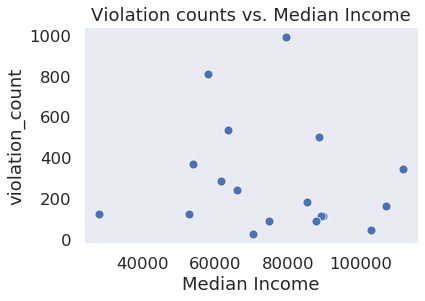

In [24]:
sns.scatterplot(x= 'median_income',  y= 'violation_count', data= zip_merge).set_title("Violation counts vs. Median Income")
plt.grid(False)
plt.xlabel("Median Income")
plt.ylabel= (' Violation Count')

Median income vs. violation count. No obvious pattern is seen.

Text(0.5, 0, 'Year')

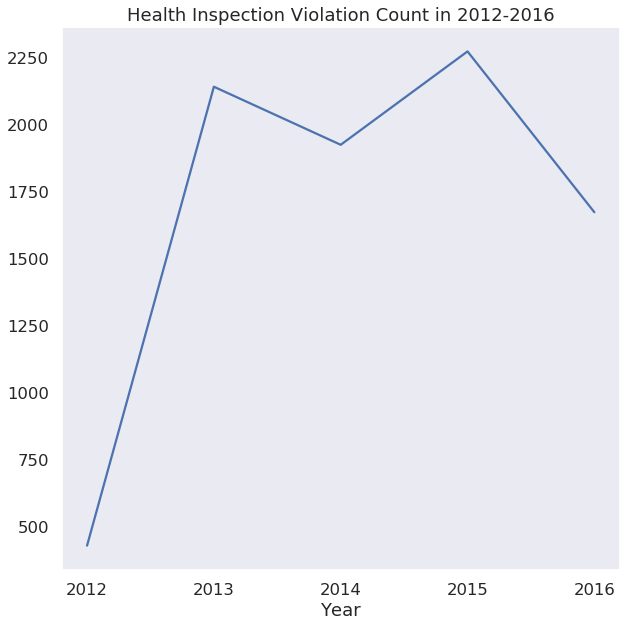

In [25]:
viol_year_vc= rest_viol.year.value_counts().sort_index()
viol_year_count= np.array(viol_year_vc.values)

plt.rcParams['figure.figsize'] = (10, 10)
sns.lineplot(x= [2012, 2013, 2014, 2015, 2016], y= viol_year_count).set_title("Health Inspection Violation Count in 2012-2016")
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.grid(False)
plt.xlabel("Year")

Violation counts over the years. 2012 had a lot less observations, that is why there are so few violations, but there seems to be a decrease at 2016.

Text(0.5, 0, 'Violation count')

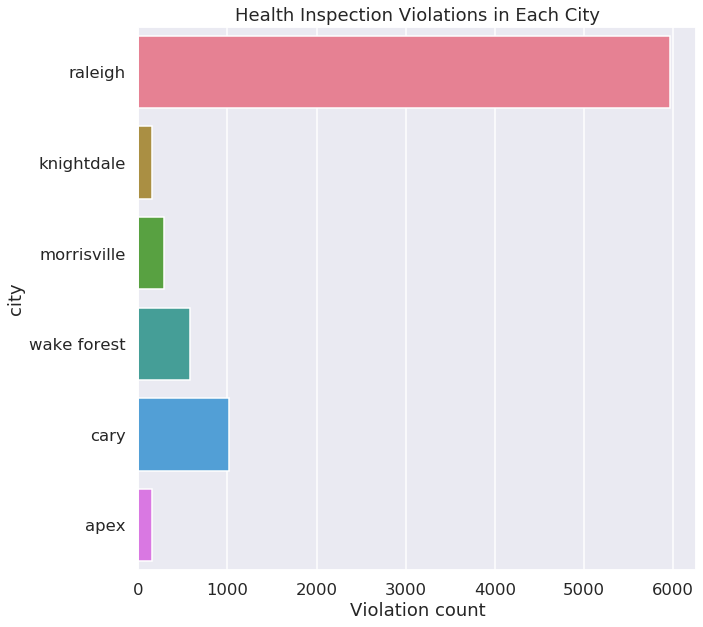

In [26]:
drop_cities= ['wendell', 'rolesville', 'new hill', 'clayton', 'willow spring', 'angier', 
              'creedmoor', 'rtp', 'durham', 'chapel hill', 
               'rdu', 'zebulon', 'holly springs', 'garner', 'fuquay-varina']

rest_viol_2 = rest_viol[~rest_viol.city.isin(drop_cities)]
sns.countplot(y= 'city', data= rest_viol_2, palette="husl").set_title("Health Inspection Violations in Each City",)
plt.xlabel('Violation count')

The counts of health inspection violations by city. I had to drop some cities as Raleigh 
had a lot more violations than the other cities.

Omitting Raleigh, this is what the counts in other cities look like. Wendell, Rolesville, Durham, and Holly Springs
seem to have really low violation counts regardless.

Text(0.5, 0, 'Violation count')

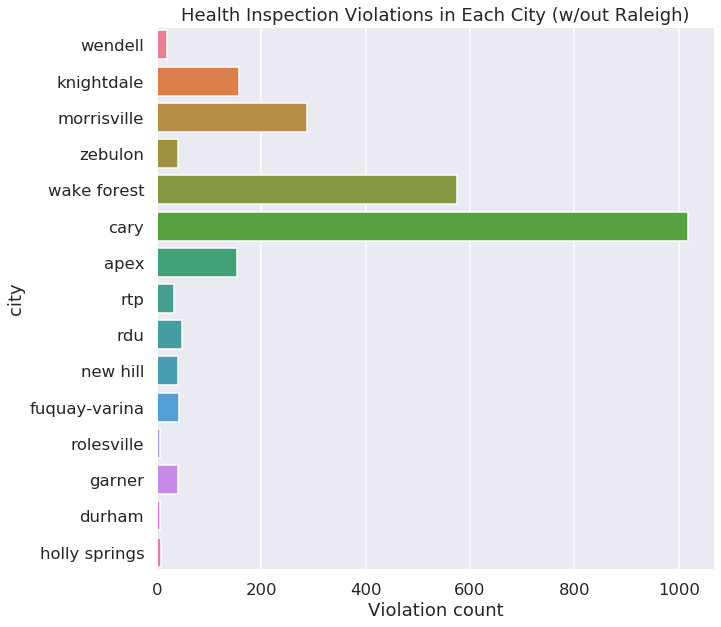

In [27]:
drop_cities= ['raleigh']
rest_viol_3 = rest_viol[~rest_viol.city.isin(drop_cities)]
sns.countplot(y= 'city', data= rest_viol_3, palette="husl").set_title("Health Inspection Violations in Each City (w/out Raleigh)",)
plt.xlabel('Violation count')

Health inspection violation count by severity.

Text(0.5, 0, 'Violation count')

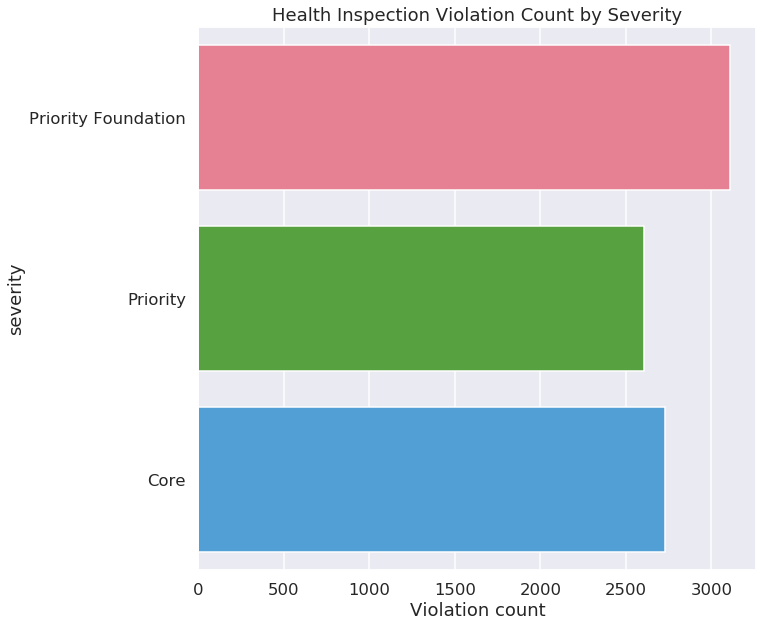

In [28]:
sns.countplot(y= 'severity', data= rest_viol, palette= 'husl').set_title("Health Inspection Violation Count by Severity")
plt.xlabel('Violation count')

Scatter plot of score against amount of critical violations. It makes sense that the highest scores cluster towards 0 critical violations.

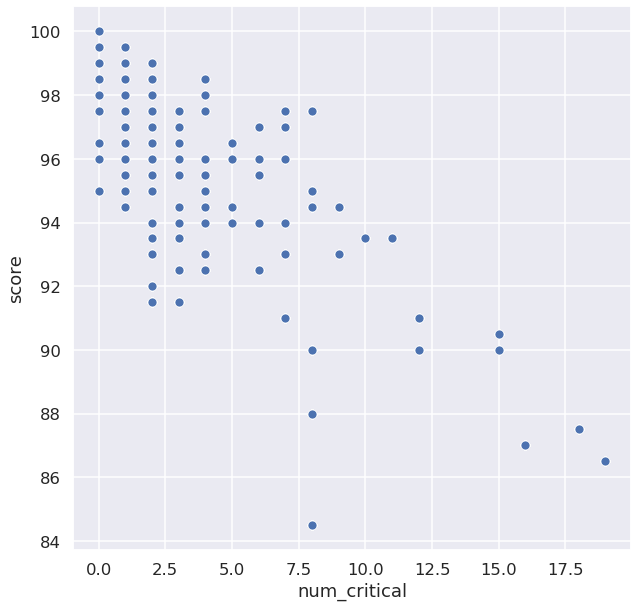

In [29]:

sns.scatterplot(x= 'num_critical', y= 'score', data= merged_num)

Checking distribution of response variable, the health inspection score

(0, 100)

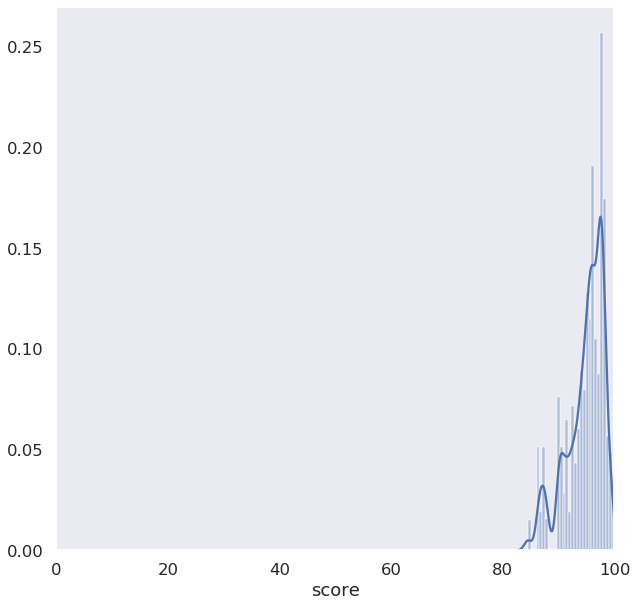

In [30]:
#checking distribution
sns.distplot(merged_num.score) #normal, but skewed.
plt.grid(False)
plt.xlim([0,100])

The shape of the graph is somewhat normal, but very skewed, so I standardized the score values.
Each observation is subtracted by the mean of the all the scores, and then divided by the standard deviation.

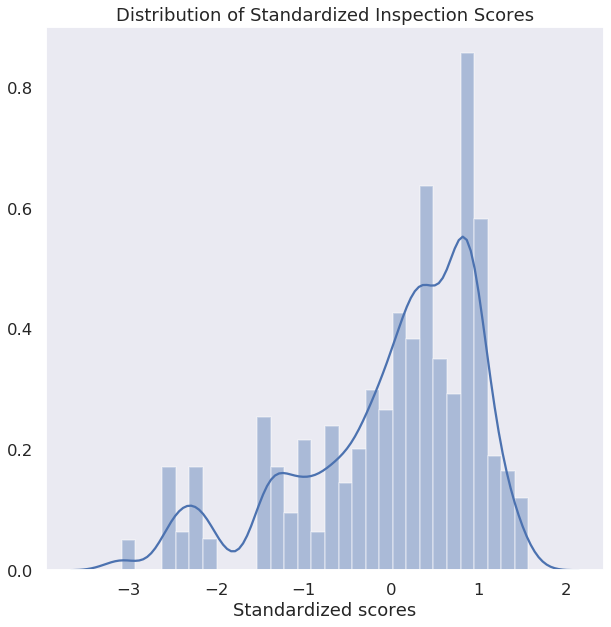

In [31]:
#standardize the data
plt.rcParams['figure.figsize'] = (10, 10)
manual= (merged_num.score - merged_num.score.mean()) / merged_num.score.std()
sns.distplot(manual, kde= True).set_title("Distribution of Standardized Inspection Scores")
manual.mean()
plt.xlabel("Standardized scores")
plt.grid(False)

It is still skewed and the distribution looks a bit bivariate, but it is still a lot more normal than before, and the 
range of values have also decreased.

I also checked the distribution of median_income.

Text(0.5, 0, 'Median income')

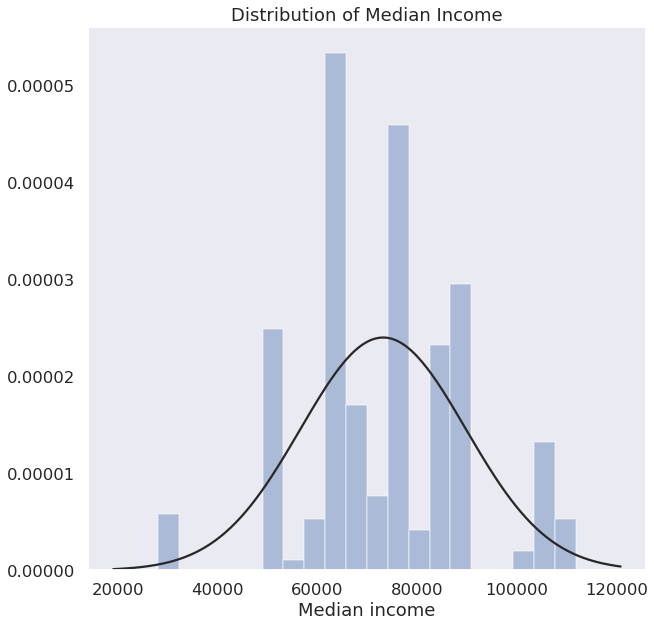

In [32]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.distplot(merged.median_income, bins= 20, kde= False, fit= norm).set_title("Distribution of Median Income")
plt.grid(False)
plt.xlabel("Median income")

The distribution of the values somewhat resembles normal distribution, but the range of the 
values are also very big, so I standardized median income as well.

Text(0.5, 0, 'Standardized median income')

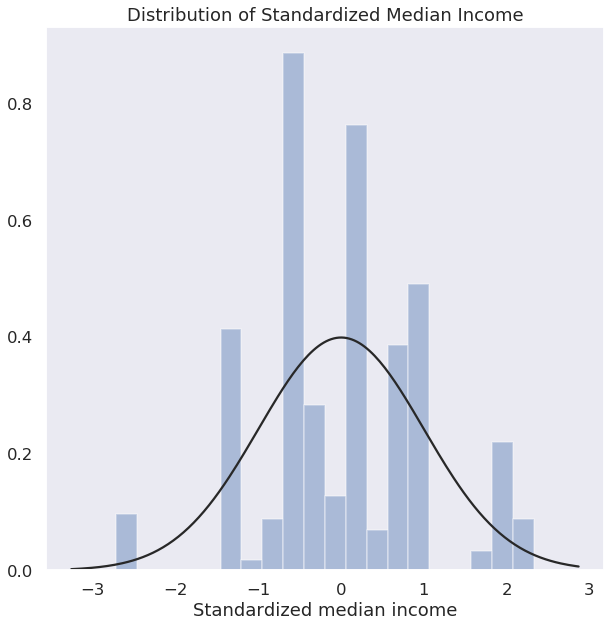

In [33]:
manual_income= (merged_num.median_income - merged_num.median_income.mean()) / merged_num.median_income.std()
sns.distplot(manual_income, bins= 20, fit= norm, kde= False).set_title("Distribution of Standardized Median Income")
plt.grid(False)
plt.xlabel("Standardized median income")

The shape is similar to the distribution before standardization, but now the range of the values are reduced by a lot.

In [34]:
merged_num.score= manual
merged_num.median_income= manual_income

## Regression 

Randomly splitting the data into training and testing set. I followed the 80% 20% rule, training set takes 80% 
of the size of the dataset, testing takes the rest 20%.

In [35]:
rows= merged_num.shape[0]

merged_num= merged_num.sample(frac=1)
ind= int(0.8*rows)
ind
test= merged_num.loc[ind:, ]
train= merged_num.loc[:ind, ]


In [36]:
x_train = train[['median_income','num_critical', 'num_non_critical',
       'critical', 'severity_core',
       'severity_priority', 'obs_out', 'viol_cdi', 'viol_r']] 

y_train = train['score']

x_test = test[['median_income','num_critical', 'num_non_critical',
       'critical', 'severity_core',
       'severity_priority', 'obs_out', 'viol_cdi', 'viol_r']]
y_test= test['score']

mod= sm.OLS(y_train, x_train)
res= mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     559.6
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:29:26   Log-Likelihood:                -1634.8
No. Observations:                1997   AIC:                             3288.
Df Residuals:                    1988   BIC:                             3338.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
median_income         0.0562      0.01

The multivariate regression model above fits the training data pretty well with an adjusted R^2 value of 0.676.
At a significance level of 0.05, 
the predictors that are statistically significant are median_income, num_critical, and num_non_critical. I noticed that both critical and non-critical have negative coefficients, which means that even a non-critical violation can affect an inspection score.

$$ Y= 0.032 - 0.12*X_1 - 0.046*X_2 - 0.004*X_3 + 0.6178*X_4 - 0.018*X_5 - 0.10*X6 $$

In [37]:
pred= res.predict(x_test) 

pred_table= pd.DataFrame(data= pred, columns= ['predicted_score'])
pred_table['actual_score']= y_test
pred_table['diff']= abs(pred_table.actual_score - pred_table.predicted_score)

pred_table.head()
print("Average difference between predicted and actual score:", pred_table['diff'].mean())
print("MSE from the multivariate regression model:", mean_squared_error(y_test, pred))

Average difference between predicted and actual score: 0.42259711804340405
MSE from the multivariate regression model: 0.32151602660087


Using the regression model above to predict the scores in the test set, the predicted scores differs from the 
actual values by 0.42 on average. The testing MSE is 0.314.

Since I used a lot of variables, I wanted to implement a LASSO regrssion to try minimizing the MSE. I used 5-fold cross validation to find the best penalty term.

In [38]:
lasso= Lasso()
alphas= {'alpha': [0.05, 0.1, 0.5, 0.75, 1, 5, 10, 20]}
lasso_reg= GridSearchCV(lasso, alphas, scoring= 'neg_mean_squared_error', cv= 5)

lasso_reg.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.05, 0.1, 0.5, 0.75, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [39]:
print("Optimal tuning parameter obtained from 5-fold CV:",lasso_reg.best_params_ )

Optimal tuning parameter obtained from 5-fold CV: {'alpha': 0.05}


In [40]:
lasso_train= Lasso(alpha = 0.05).fit(x_train, y_train)
lasso_pred= lasso_train.predict(x_test)

In [41]:
print("MSE from LASSO regression model:", mean_squared_error(y_test, lasso_pred))

MSE from LASSO regression model: 0.3215481698213283


In [42]:
ridge= Ridge()
alphas= {'alpha': [0.05, 0.1, 0.5, 0.75, 1, 5, 10, 20]}
ridge_cv= GridSearchCV(ridge, alphas, scoring= 'neg_mean_squared_error', cv= 5)
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.05, 0.1, 0.5, 0.75, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
ridge_train= Ridge(alpha = 20).fit(x_train, y_train)
ridge_pred= ridge_train.predict(x_test)

In [44]:
print("Optimal tuning parameter obtained from 5-fold CV:",ridge_cv.best_params_ )

Optimal tuning parameter obtained from 5-fold CV: {'alpha': 20}


In [45]:
print("Ridge regression MSE:",mean_squared_error(y_test, ridge_pred))

Ridge regression MSE: 0.32051974837438807


I carried out PCA to try to see what variables are responsible for the variance in the data.

In [46]:
#carry out pca
predictors= merged_num[['median_income','num_critical', 'num_non_critical',
       'critical', 'severity_core',
       'severity_priority', 'obs_out', 'viol_cdi', 'viol_r']] .values
response= merged_num['score'].values

In [47]:
pca = PCA(n_components=4)
pca_fit = pca.fit(predictors)
PCs = pca.fit_transform(predictors)

In [48]:
print(pca_fit.components_)

[[-2.38763973e-02  7.53852404e-01  6.56343085e-01  5.54587509e-04
  -5.54587509e-04 -2.25640926e-03  1.32541905e-05 -1.28532881e-02
   1.33907409e-02]
 [-5.09693493e-02 -6.55937497e-01  7.50747428e-01 -3.48289564e-02
   3.48289564e-02 -1.80178817e-02 -2.47902726e-04 -1.67355124e-02
   2.22604863e-02]
 [-9.89382561e-01  1.07672434e-02 -4.72119214e-02  8.65143839e-02
  -8.65143839e-02  4.55436181e-02 -7.70546116e-04  3.56801936e-02
  -2.14448078e-02]
 [-1.22033518e-01  3.03714642e-02 -5.78208365e-02 -4.82101703e-01
   4.82101703e-01 -3.17587104e-01  1.42855046e-03 -4.47796508e-01
   4.63263122e-01]]


In [49]:
print(pca_fit.explained_variance_)

[42.6638071   4.66202731  0.97332671  0.68623087]


[0.86418789 0.09443291 0.01971547 0.01390013]


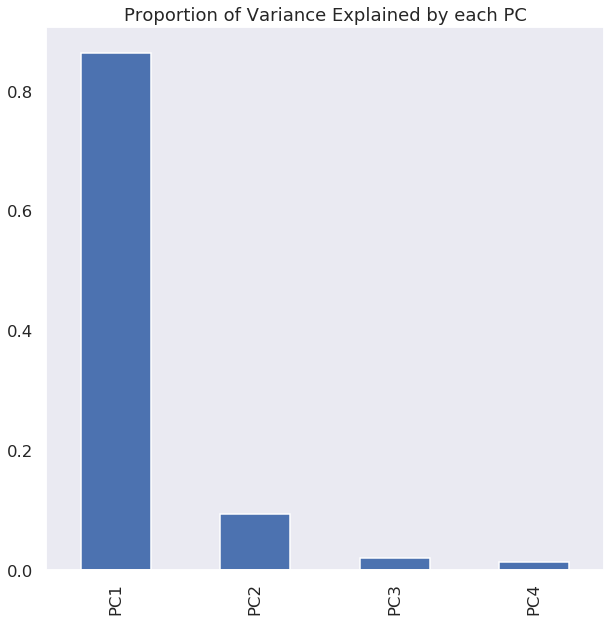

In [51]:
print(pca_fit.explained_variance_ratio_)
var_exp = pd.DataFrame(pca_fit.explained_variance_ratio_,
                       ['PC1', 'PC2','PC3','PC4'])
var_exp.plot.bar(legend= None)
plt.title("Proportion of Variance Explained by each PC")
plt.grid(False)

More than 85% of variance in the data is caused by PC1. I then tried to get the variable that is responsible for
the most variance in each principal component.

In [52]:
n_pcs= 4

ind=[]

for i in range(n_pcs):
    comp= pca_fit.components_[i].argmax()
    ind.append(comp)  

important_var= []
feature_name= ['median_income','num_critical', 'num_non_critical',
       'critical', 'severity_core',
       'severity_priority', 'obs_out', 'viol_cdi', 'viol_r']

for i in range(n_pcs):
    important_var.append(feature_name[ind[i]])

pc_df= pd.DataFrame(data= ['PC1', 'PC2', 'PC3', 'PC4'], columns= ['PC'])
pc_df['variable']= pd.DataFrame(data= important_var)

In [53]:
pc_df

,PC,variable
0,PC1,num_critical
1,PC2,num_non_critical
2,PC3,critical
3,PC4,severity_core


We have that the variable with the biggest weight in PC! is num_critical. However, since each PC is a linear combination of the predictors, I cannot conclude that num_critical is the sole reason for the variance in the data.

# Ethics and Privacy

I carried out this analysis to try to understand how health inspections scores are affected by other variables. I believe that my intentions are well-posed ane neutral without any explicit biases or proclivities coming from my end. In addition, healh inspection data within the United States are typically available to the public wuthout any restrictions, so I believe that I am not breaching any individual's privacy.

However, out of the 4 datasets that I used here, I only know where inspections, violations, and restaurants are from. I have no knowledge of how or when the zipcode data was collected. The data collected might be biased towards or against some demographics in Wake County, which means that carrying out this analysis might be harmful due to the underlying biases that I do not recognize or realize. 

Even if I have some idea of how the rest of the datasets were collected, the same reasoning still stands. There might still be selection bias when the data was collected. For example, why are the the violation counts for some cities so low? Is it truly because there are actually very few violations in those municipalities, or are those areas excluded more during data collection for some reason? These are all things that need to be taken into consideration, especially since I do not have full knowledge of where the data comes from. I also have to recognize that even if I am not being explicity towards a certain demographic, I have my own predispositions that might have come out. 

# Conclusion and Discussion

I found that health inspection scores are statistically affected by some variables, and the multivariate regression model above has pretty good adjusted R^2 value and the MSE is also pretty low. I thought that since some of the predictors are not statistically significant in the regression, I could further lower the MSE by doing regularization through LASSO or Ridge regression, but both methods end up with a slightly higher testing MSE. It is possible that there are better apporaches in trying to study the relationship of the scores and the variables, since both the scores and the median income are still skewed even after transformation.

Some issues that I faced when doing this analysis was the unknown nature of the datasets and the lack of information. There were some columns that I still do not understand even after using the health department website as a reference. I also could not figure out how to use the Yelp data, since the Yelp data had much less observations than the other ones. The other datasets had a lot of observations, but so many of them had null values, in different columns, too. It was a lot of work trying to clean the data because I am not used to working with them.

Another limitation was definitely time. If I had more time I would definitely try out different approaches on analyzing the data.